# Kickstarter EDA
## Load data

In [2]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_pickle("master")

In [23]:
print(df.nunique())
print(df.shape)

location_country              203
location_state               1236
location_localized_name     12403
cbsa_name                     878
top100                          2
backers_count                3580
goal                         5908
pledged                     49808
creator_name               187401
gender                          6
category_broad                 15
category_name                 158
launched_at                228934
deadline                   212094
state_changed_at           215359
state                           5
life                        65184
duration                    78678
prep                       213055
dtype: int64
(253465, 19)


In [25]:
df.isnull().sum()

location_country             1019
location_state               1069
location_localized_name     52324
cbsa_name                  106593
top100                     106593
backers_count                   0
goal                            0
pledged                         0
creator_name                    0
gender                          0
category_broad                  0
category_name                   0
launched_at                     0
deadline                        0
state_changed_at                0
state                           0
life                            0
duration                        0
prep                            0
dtype: int64

In [40]:
df["launched_year"] = df['launched_at'].dt.year

In [41]:
df[df['location_state']=='CA'].groupby(['location_state','launched_year'])['duration'].count()

location_state  launched_year
CA              2009              101
                2010             1085
                2011             2739
                2012             3557
                2013             2895
                2014             4455
                2015             4814
                2016             3152
                2017             2480
                2018              473
Name: duration, dtype: int64

In [62]:
np.random.seed(0)

## Scaling and Randomization

In [63]:
from scipy import stats


In [42]:
df['pledged_log'] = np.log(df['pledged']+1)
df['goal_log'] = np.log(df['goal']+1)

## Visualize

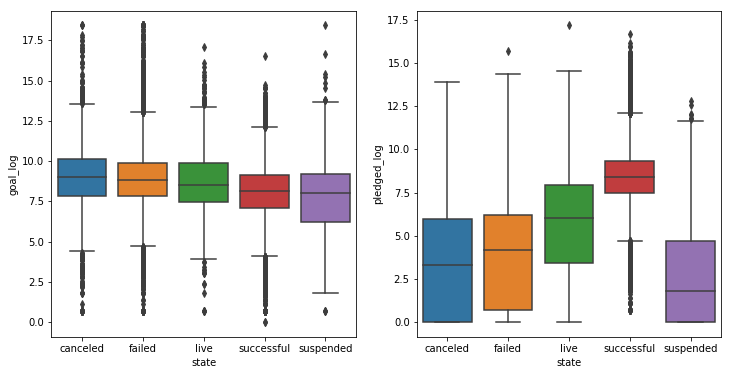

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(x='state', y="goal_log", data = df)

plt.subplot(122)
sns.boxplot(x='state', y="pledged_log", data = df)

plt.show()

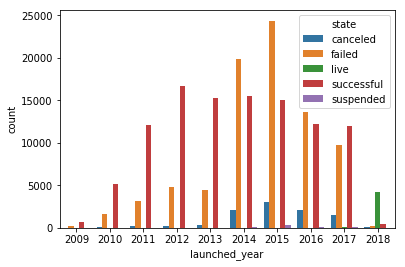

In [44]:
sns.countplot(x='launched_year', data = df, hue='state')
plt.show()

In [46]:
df['state'].value_counts()

successful    105055
failed         82220
canceled        9764
live            4358
suspended        678
Name: state, dtype: int64

In [45]:
row_col = ['state', 'launched_year']

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[row_col[0]], df[row_col[1]]).style.background_gradient(cmap = cm)
# pd.crosstab(df[df['top100']==1][row_col[0]], df[df['top100']==1][row_col[1]]).style.background_gradient(cmap = cm)

launched_year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
state,,,,,,,,,,
canceled,15,78,212,269,285,2144,3070,2095,1501,95
failed,250,1632,3133,4839,4406,19887,24369,13644,9802,258
live,0,0,0,0,0,0,0,0,120,4238
successful,649,5123,12093,16644,15332,15489,15037,12169,12049,470
suspended,0,0,5,5,1,110,368,103,78,8


In [47]:
df_USA = df[df.location_country == "US"]

df_USA.to_csv('kickstarter.csv')